In [2]:
# 경고메세지 제거
import warnings
warnings.filterwarnings('ignore')

# library import
import numpy as np
import pandas as pd
import glob

# 시각화 library import
!pip install missingno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#한글폰트 오류안나게
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_fname = 'C:\\Windows\\Fonts\\batang.ttc' # 아래한글 함초롱바탕 글꼴
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams['font.family'] = font_family


from sklearn.decomposition import PCA
import umap
from sklearn.manifold import TSNE

In [3]:
sampledata = pd.read_csv('cluster_final.csv')

In [4]:
sampledata = sampledata.drop('Unnamed: 0', axis=1)

In [5]:
sampledata.head()

,정규화_부유도,Life_Stage,VIP등급코드,1순위업종,2순위업종,3순위업종,기준년월,연령,회원여부_이용가능,회원여부_이용가능_CA,...,총이용금액,총유효카드수,총연회비,연체비율,부유도_지표,이용금액_신판_B0M,이용금액_신판_R3M,이용금액_신판_R6M,이용금액_신판_R12M,Cluster
0,2.190501,4,Missing,Missing,Missing,Missing,201812,30.0,1,1,...,0,1,0,0.0,3.30,0,0,0,0,0
1,2.589537,5,6.0,쇼핑,사교활동,Missing,201812,40.0,1,1,...,2536626,2,0,0.0,1014654.85,356157,1198209,2220619,8070164,1
2,2.293384,7,Missing,납부,Missing,Missing,201812,60.0,1,1,...,654004,1,0,0.0,261607.90,-10787,20528,-96041,1794462,0
3,2.190501,4,Missing,Missing,Missing,Missing,201812,30.0,1,1,...,0,1,0,0.0,3.30,0,0,0,132649,0
4,2.706978,2,Missing,쇼핑,교통,사교활동,201812,20.0,1,1,...,3283186,1,0,0.0,1313276.70,520032,1663858,3411965,5113491,1


In [6]:
sampledata.columns

Index(['정규화_부유도', 'Life_Stage', 'VIP등급코드', '1순위업종', '2순위업종', '3순위업종', '기준년월',
       '연령', '회원여부_이용가능', '회원여부_이용가능_CA', '회원여부_이용가능_카드론', '소지여부_신용',
       '소지카드수_유효_신용', '소지카드수_이용가능_신용', '입회일자_신용', '입회경과개월수_신용', '회원여부_연체',
       '이용거절여부_카드론', '동의여부_한도증액안내', '수신거부여부_TM', '수신거부여부_DM', '수신거부여부_메일',
       '수신거부여부_SMS', '탈회횟수_누적', '최종탈회후경과월', '탈회횟수_발급6개월이내', '탈회횟수_발급1년이내',
       '마케팅동의여부', '유효카드수_신용체크', '유효카드수_신용', '유효카드수_신용_가족', '유효카드수_체크',
       '유효카드수_체크_가족', '이용가능카드수_신용체크', '이용가능카드수_신용', '이용가능카드수_신용_가족',
       '이용가능카드수_체크', '이용가능카드수_체크_가족', '이용카드수_신용체크', '이용카드수_신용', '이용카드수_신용_가족',
       '이용카드수_체크', '이용카드수_체크_가족', '이용금액_R3M_신용체크', '이용금액_R3M_신용',
       '이용금액_R3M_신용_가족', '이용금액_R3M_체크', '이용금액_R3M_체크_가족', '_1순위카드이용금액',
       '_1순위카드이용건수', '_2순위카드이용금액', '_2순위카드이용건수', '최종유효년월_신용_이용가능',
       '최종유효년월_신용_이용', '최종카드발급일자', '보유여부_해외겸용_본인', '이용가능여부_해외겸용_본인',
       '이용여부_3M_해외겸용_본인', '보유여부_해외겸용_신용_본인', '이용가능여부_해외겸용_신용_본인',
       '이용여부_3M_해외겸용_신용_본인', '연회비발생카드수_B0M', '연회비할인카드수_B0M', '기본연회비_

In [7]:
# 클러스터 0 데이터 필터링
cluster_0_data = sampledata[sampledata['Cluster'] == 0]

In [8]:
# 클러스터 0의 데이터 통계 요약
print(cluster_0_data.describe())

# 클러스터 0의 범주형 변수에 대한 정보
print(cluster_0_data.describe(include='object'))

             정규화_부유도     Life_Stage      기준년월             연령      회원여부_이용가능  \
count  112575.000000  112575.000000  112575.0  112575.000000  112575.000000   
mean        2.252670       4.176220  201812.0      39.996802       0.865672   
std         0.128711       1.400828       0.0      11.032232       0.341006   
min         1.000001       1.000000  201812.0      20.000000       0.000000   
25%         2.190502       4.000000  201812.0      30.000000       1.000000   
50%         2.190502       4.000000  201812.0      40.000000       1.000000   
75%         2.293681       5.000000  201812.0      50.000000       1.000000   
max         2.883373       7.000000  201812.0      60.000000       1.000000   

        회원여부_이용가능_CA  회원여부_이용가능_카드론        소지여부_신용    소지카드수_유효_신용  \
count  112575.000000  112575.000000  112575.000000  112575.000000   
mean        0.732365       0.549980       0.930198       1.044637   
std         0.442728       0.497498       0.254815       0.442781   
min         

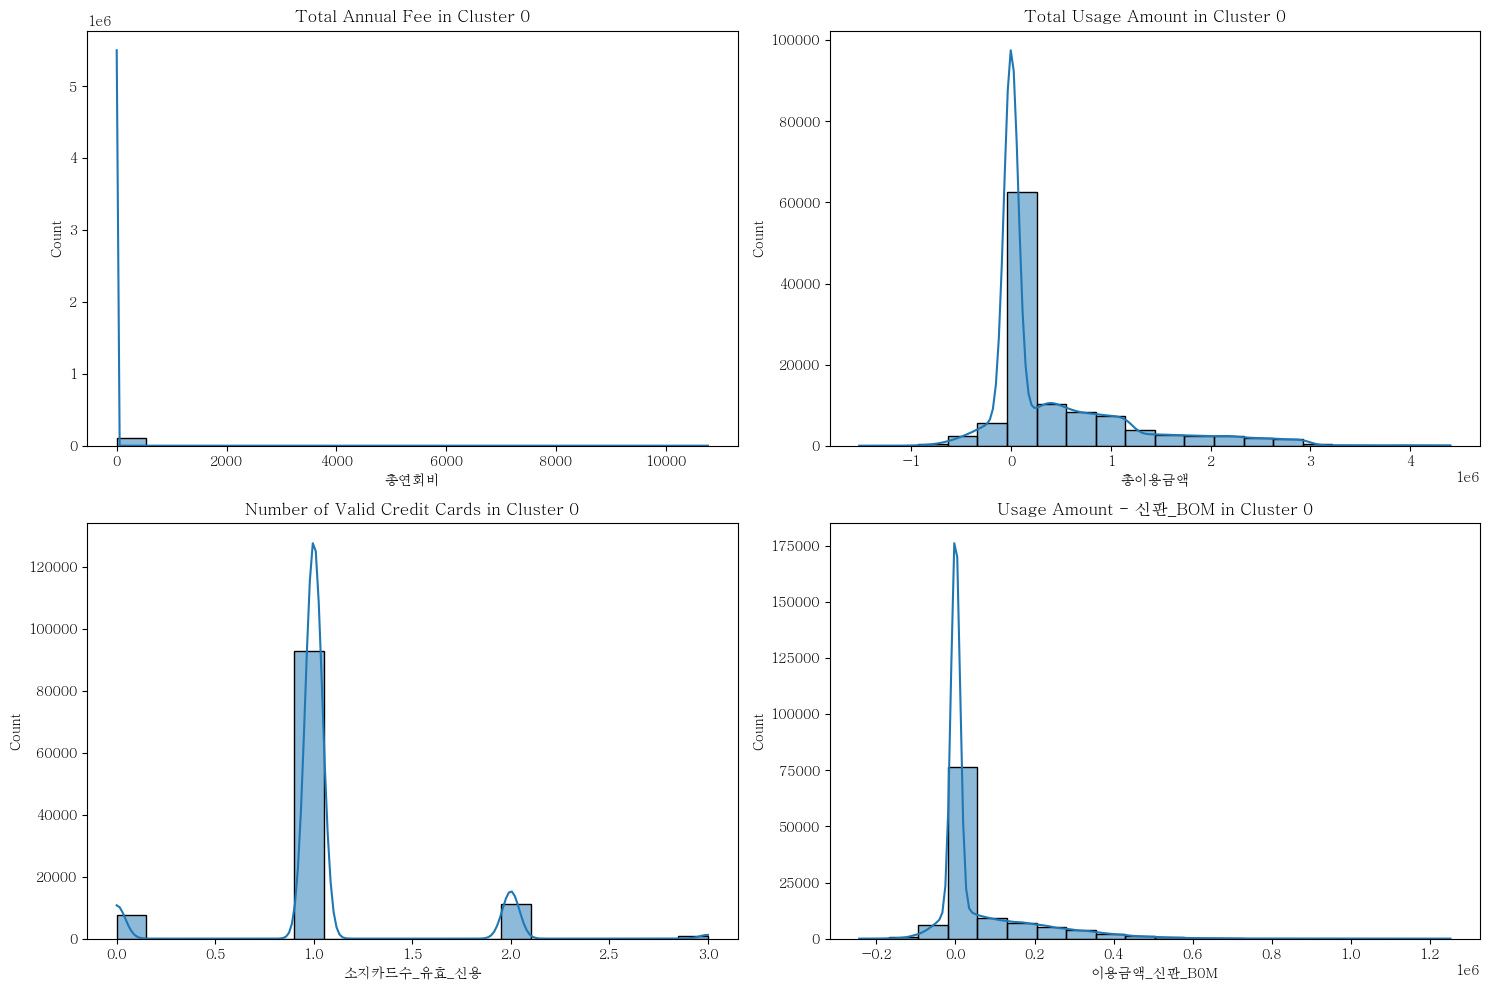

In [11]:
plt.figure(figsize=(15, 10))

# 총연회비 분포 확인
plt.subplot(2, 2, 1)
sns.histplot(cluster_0_data['총연회비'], bins=20, kde=True)
plt.title('Total Annual Fee in Cluster 0')

# 총이용금액 분포 확인
plt.subplot(2, 2, 2)
sns.histplot(cluster_0_data['총이용금액'], bins=20, kde=True)
plt.title('Total Usage Amount in Cluster 0')

# 소지카드수_유효_신용 분포 확인
plt.subplot(2, 2, 3)
sns.histplot(cluster_0_data['소지카드수_유효_신용'], bins=20, kde=True)
plt.title('Number of Valid Credit Cards in Cluster 0')

# 이용금액_신판_B0M 분포 확인
plt.subplot(2, 2, 4)
sns.histplot(cluster_0_data['이용금액_신판_B0M'], bins=20, kde=True)
plt.title('Usage Amount - 신판_BOM in Cluster 0')

plt.tight_layout()
plt.show()

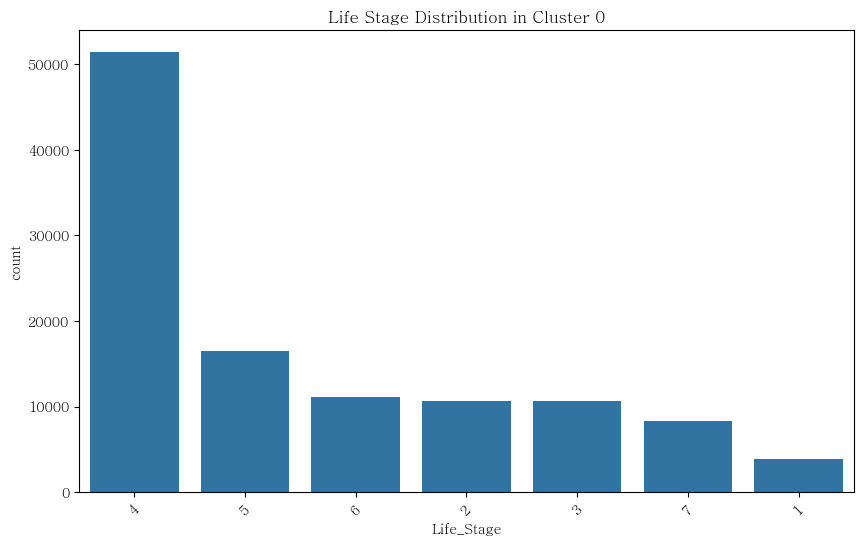

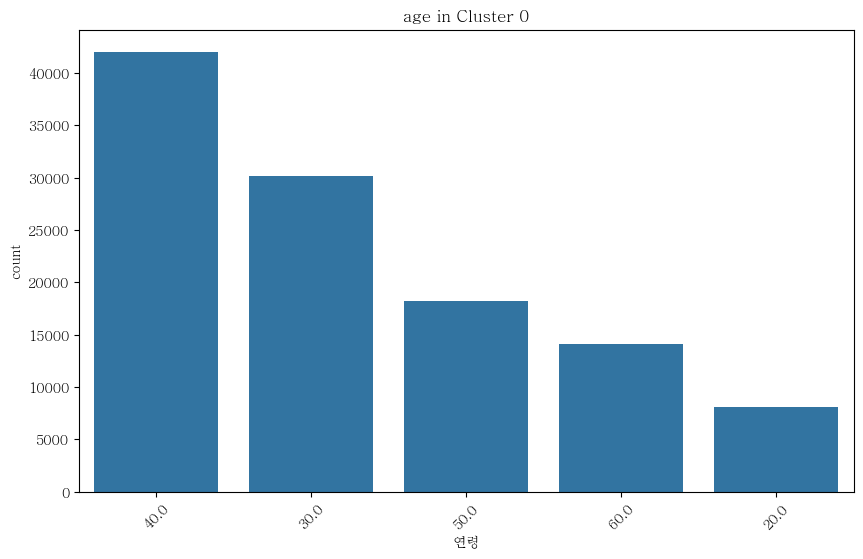

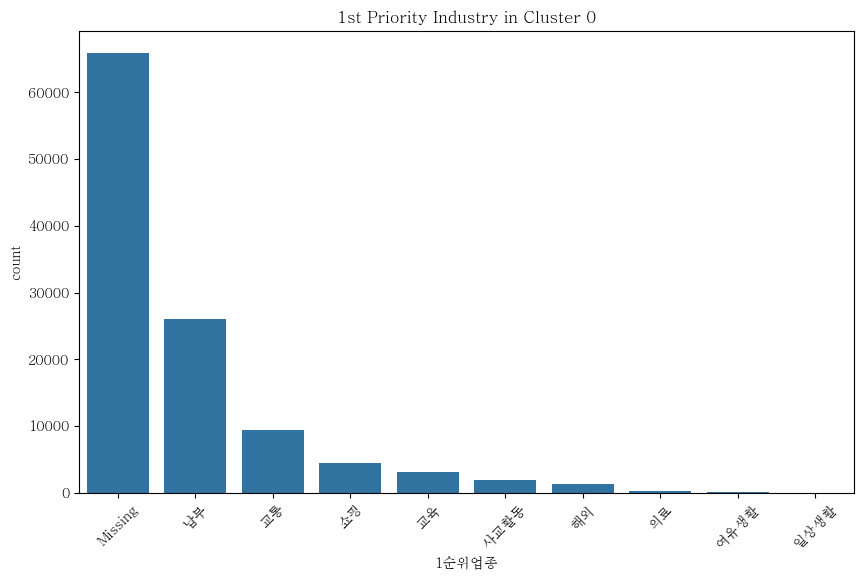

In [10]:
# 'Life_Stage' 변수의 분포 확인
plt.figure(figsize=(10, 6))
sns.countplot(x='Life_Stage', data=cluster_0_data, order=cluster_0_data['Life_Stage'].value_counts().index)
plt.title('Life Stage Distribution in Cluster 0')
plt.xticks(rotation=45)
plt.show()

# '연령' 변수의 분포 확인
plt.figure(figsize=(10, 6))
sns.countplot(x='연령', data=cluster_0_data, order=cluster_0_data['연령'].value_counts().index)
plt.title('age in Cluster 0')
plt.xticks(rotation=45)
plt.show()

# '1순위업종' 변수의 분포 확인
plt.figure(figsize=(10, 6))
sns.countplot(x='1순위업종', data=cluster_0_data, order=cluster_0_data['1순위업종'].value_counts().index)
plt.title('1st Priority Industry in Cluster 0')
plt.xticks(rotation=45)
plt.show()



In [12]:
# 클러스터 1 데이터 필터링
cluster_1_data = sampledata[sampledata['Cluster'] == 1]

In [ ]:
# 클러스터 1의 데이터 통계 요약
print(cluster_1_data.describe())

# 클러스터 1의 범주형 변수에 대한 정보
print(cluster_1_data.describe(include='object'))

            정규화_부유도    Life_Stage      기준년월            연령     회원여부_이용가능  \
count  87238.000000  87238.000000   87238.0  87238.000000  87238.000000   
mean       2.511400      4.566897  201812.0     43.881795      0.998957   
std        0.207987      1.490232       0.0     11.579456      0.032281   
min        1.000002      1.000000  201812.0     20.000000      0.000000   
25%        2.367528      4.000000  201812.0     30.000000      1.000000   
50%        2.495609      5.000000  201812.0     50.000000      1.000000   
75%        2.652198      5.000000  201812.0     50.000000      1.000000   
max        3.113690      7.000000  201812.0     60.000000      1.000000   

       회원여부_이용가능_CA  회원여부_이용가능_카드론       소지여부_신용   소지카드수_유효_신용  소지카드수_이용가능_신용  \
count  87238.000000   87238.000000  87238.000000  87238.000000   87238.000000   
mean       0.955960       0.675336      0.999175      1.201185       1.177629   
std        0.205186       0.468252      0.028717      0.456782       0.438047   


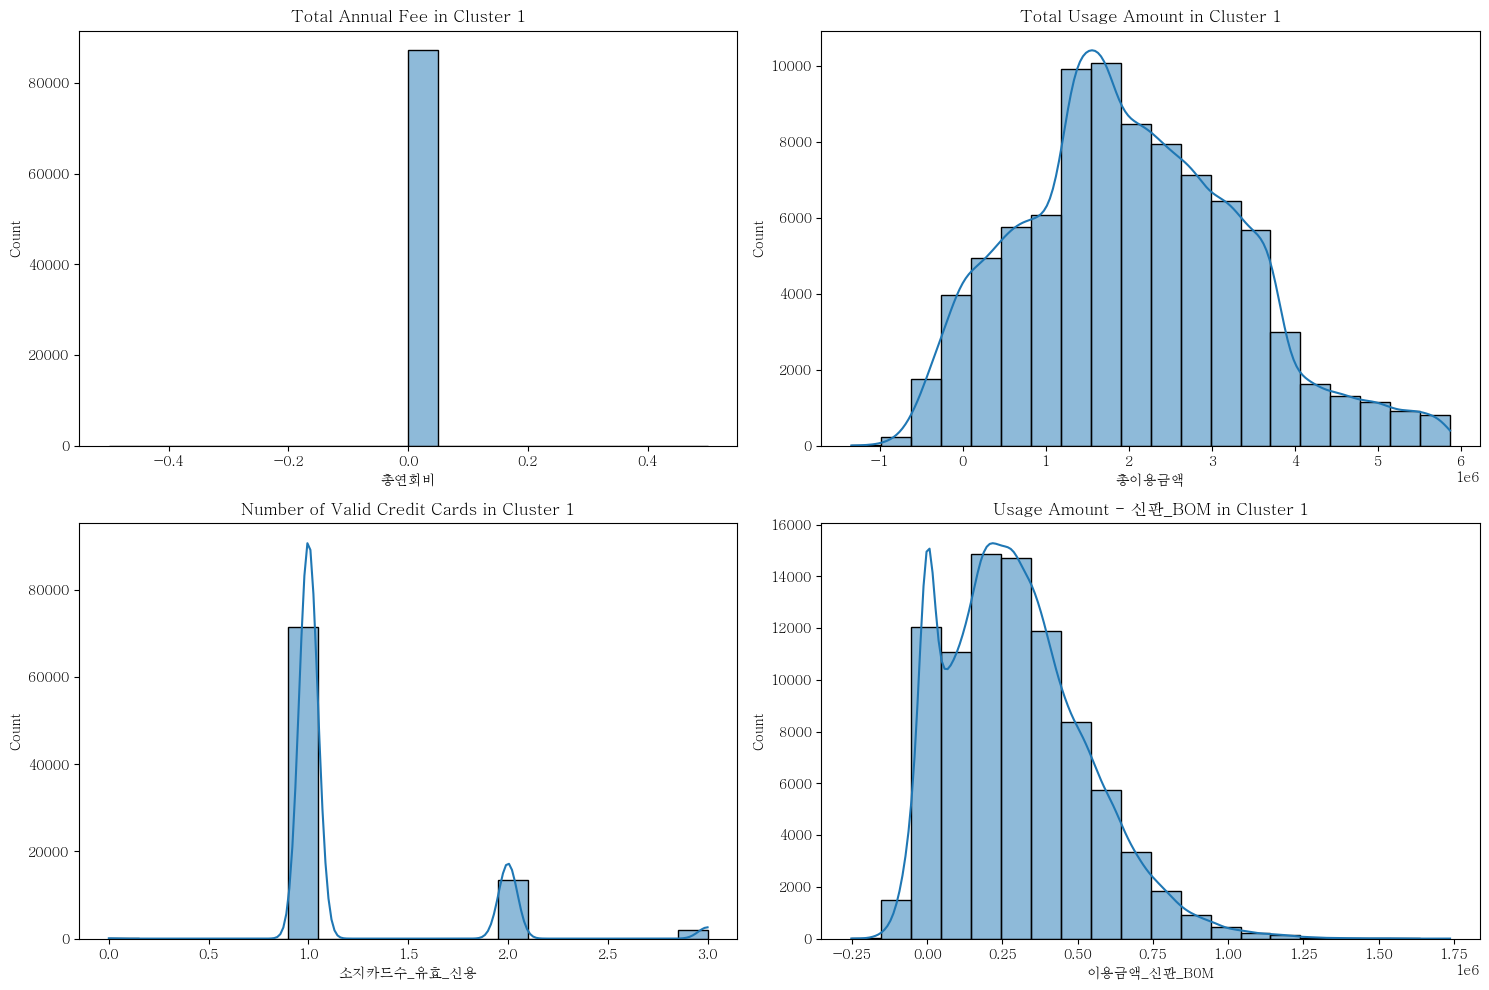

In [14]:
plt.figure(figsize=(15, 10))

# 총연회비 분포 확인
plt.subplot(2, 2, 1)
sns.histplot(cluster_1_data['총연회비'], bins=20, kde=True)
plt.title('Total Annual Fee in Cluster 1')

# 총이용금액 분포 확인
plt.subplot(2, 2, 2)
sns.histplot(cluster_1_data['총이용금액'], bins=20, kde=True)
plt.title('Total Usage Amount in Cluster 1')

# 소지카드수_유효_신용 분포 확인
plt.subplot(2, 2, 3)
sns.histplot(cluster_1_data['소지카드수_유효_신용'], bins=20, kde=True)
plt.title('Number of Valid Credit Cards in Cluster 1')

# 이용금액_신판_B0M 분포 확인
plt.subplot(2, 2, 4)
sns.histplot(cluster_1_data['이용금액_신판_B0M'], bins=20, kde=True)
plt.title('Usage Amount - 신판_BOM in Cluster 1')

plt.tight_layout()
plt.show()

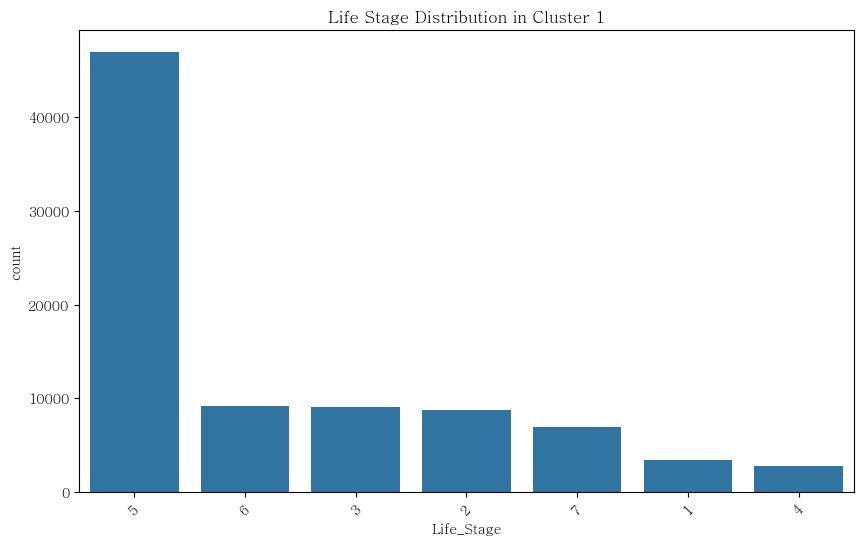

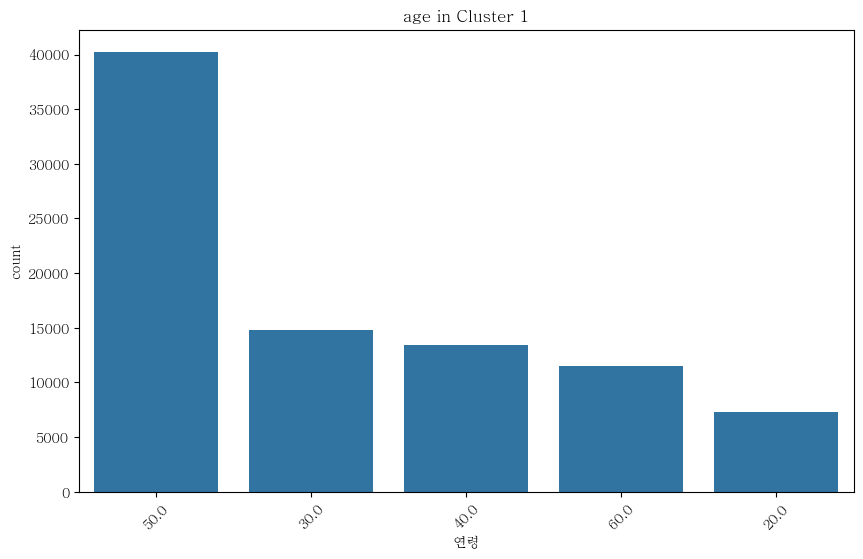

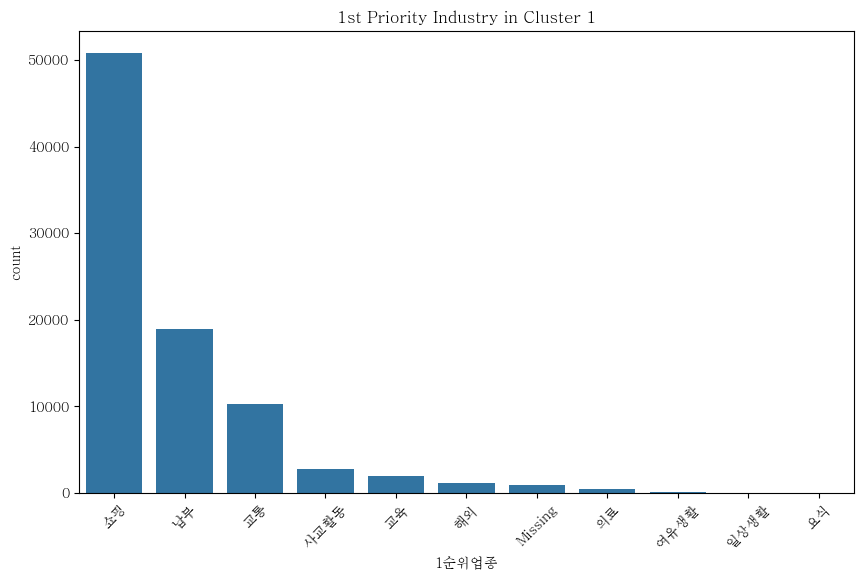

In [16]:
# 'Life_Stage' 변수의 분포 확인
plt.figure(figsize=(10, 6))
sns.countplot(x='Life_Stage', data=cluster_1_data, order=cluster_1_data['Life_Stage'].value_counts().index)
plt.title('Life Stage Distribution in Cluster 1')
plt.xticks(rotation=45)
plt.show()

# '연령' 변수의 분포 확인
plt.figure(figsize=(10, 6))
sns.countplot(x='연령', data=cluster_1_data, order=cluster_1_data['연령'].value_counts().index)
plt.title('age in Cluster 1')
plt.xticks(rotation=45)
plt.show()

# '1순위업종' 변수의 분포 확인
plt.figure(figsize=(10, 6))
sns.countplot(x='1순위업종', data=cluster_1_data, order=cluster_1_data['1순위업종'].value_counts().index)
plt.title('1st Priority Industry in Cluster 1')
plt.xticks(rotation=45)
plt.show()

In [17]:
# 클러스터 2 데이터 필터링
cluster_2_data = sampledata[sampledata['Cluster'] == 2]

In [ ]:
# 클러스터 2의 데이터 통계 요약
print(cluster_2_data.describe())

# 클러스터 2의 범주형 변수에 대한 정보
print(cluster_2_data.describe(include='object'))

            정규화_부유도    Life_Stage      기준년월            연령     회원여부_이용가능  \
count  63315.000000  63315.000000   63315.0  63315.000000  63315.000000   
mean       3.074458      3.815368  201812.0     37.081260      0.999905   
std        0.354740      1.237731       0.0      9.752454      0.009734   
min        2.471802      1.000000  201812.0     20.000000      0.000000   
25%        2.802752      3.000000  201812.0     30.000000      1.000000   
50%        3.016560      4.000000  201812.0     40.000000      1.000000   
75%        3.341145      4.000000  201812.0     40.000000      1.000000   
max        3.972309      7.000000  201812.0     60.000000      1.000000   

       회원여부_이용가능_CA  회원여부_이용가능_카드론       소지여부_신용   소지카드수_유효_신용  소지카드수_이용가능_신용  \
count  63315.000000   63315.000000  63315.000000  63315.000000    63315.00000   
mean       0.961478       0.636216      0.999305      1.402180        1.36530   
std        0.192453       0.481091      0.026353      0.630821        0.61089   


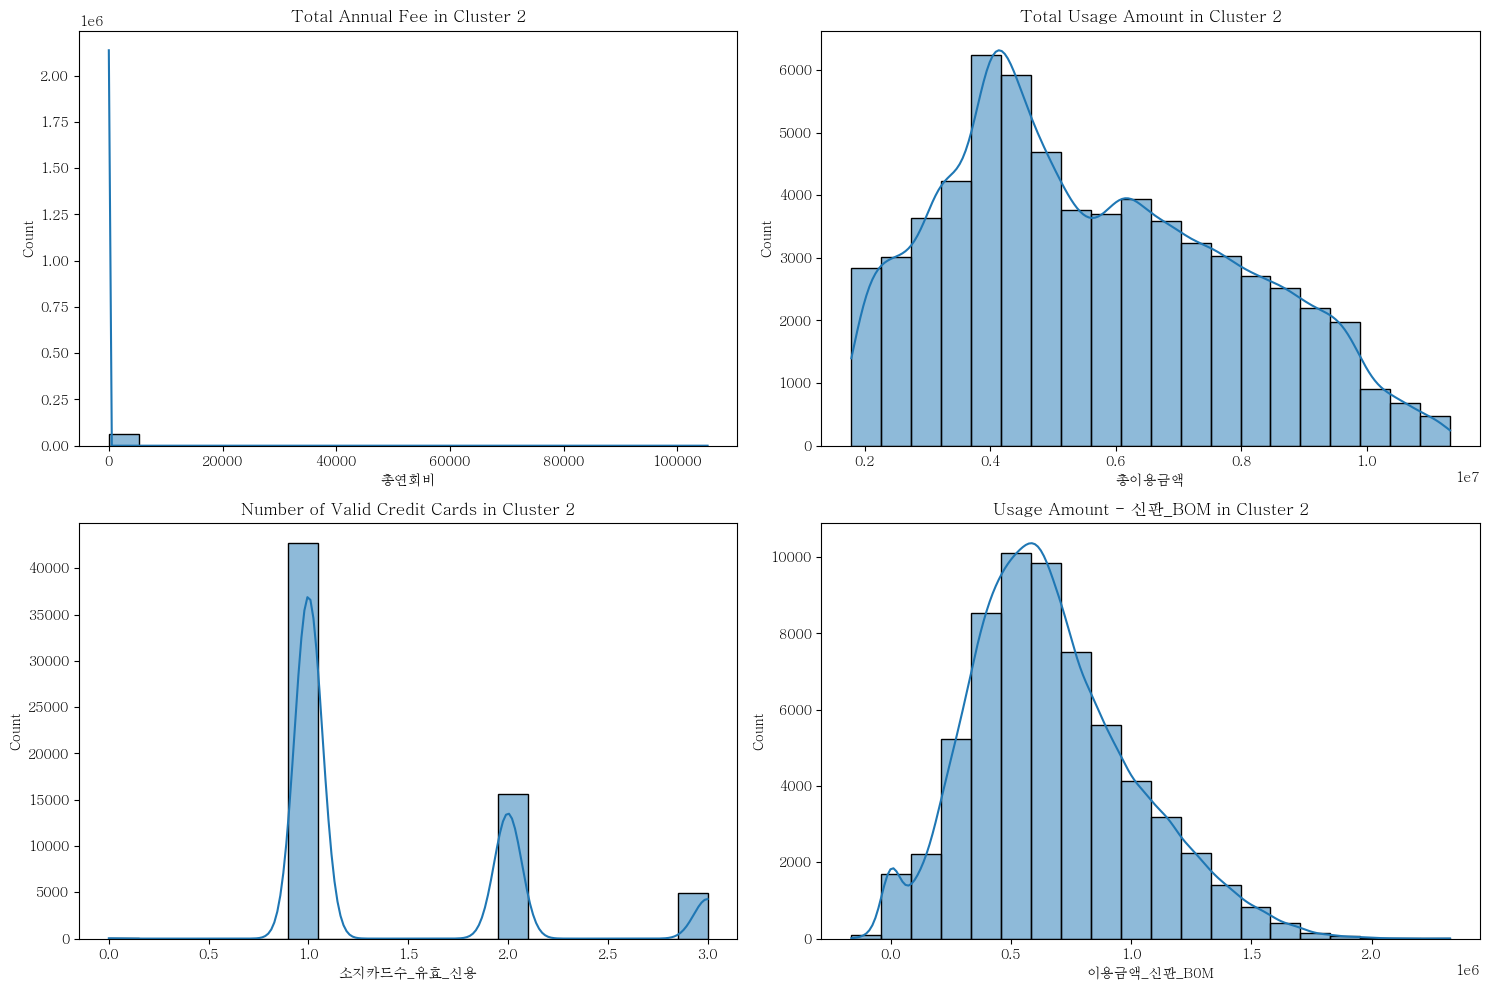

In [19]:
plt.figure(figsize=(15, 10))

# 총연회비 분포 확인
plt.subplot(2, 2, 1)
sns.histplot(cluster_2_data['총연회비'], bins=20, kde=True)
plt.title('Total Annual Fee in Cluster 2')

# 총이용금액 분포 확인
plt.subplot(2, 2, 2)
sns.histplot(cluster_2_data['총이용금액'], bins=20, kde=True)
plt.title('Total Usage Amount in Cluster 2')

# 소지카드수_유효_신용 분포 확인
plt.subplot(2, 2, 3)
sns.histplot(cluster_2_data['소지카드수_유효_신용'], bins=20, kde=True)
plt.title('Number of Valid Credit Cards in Cluster 2')

# 이용금액_신판_B0M 분포 확인
plt.subplot(2, 2, 4)
sns.histplot(cluster_2_data['이용금액_신판_B0M'], bins=20, kde=True)
plt.title('Usage Amount - 신판_BOM in Cluster 2')

plt.tight_layout()
plt.show()

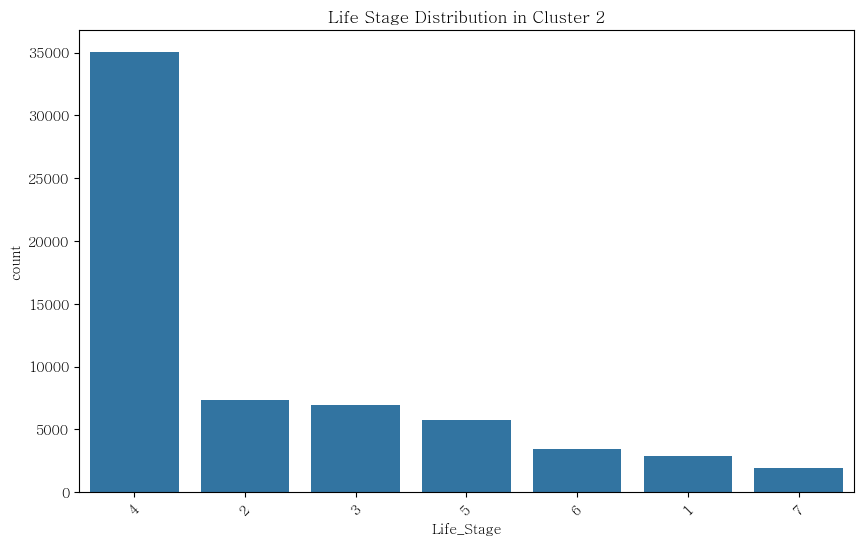

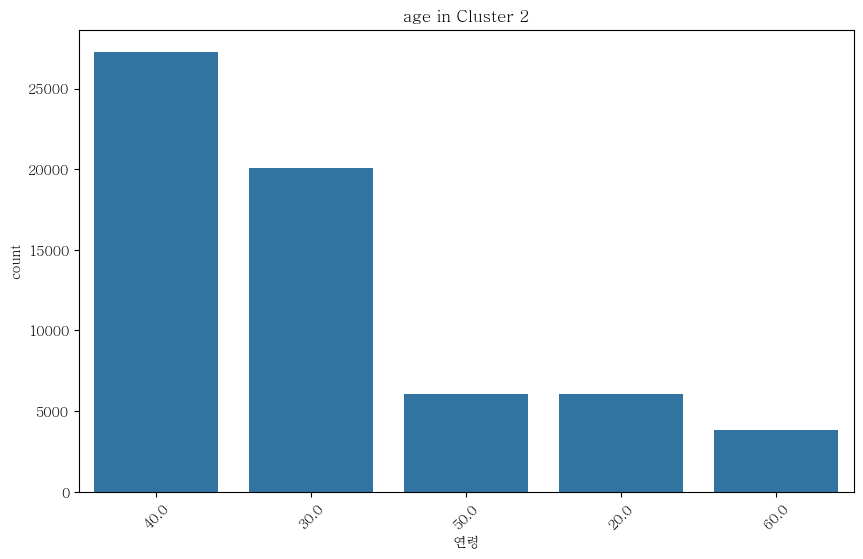

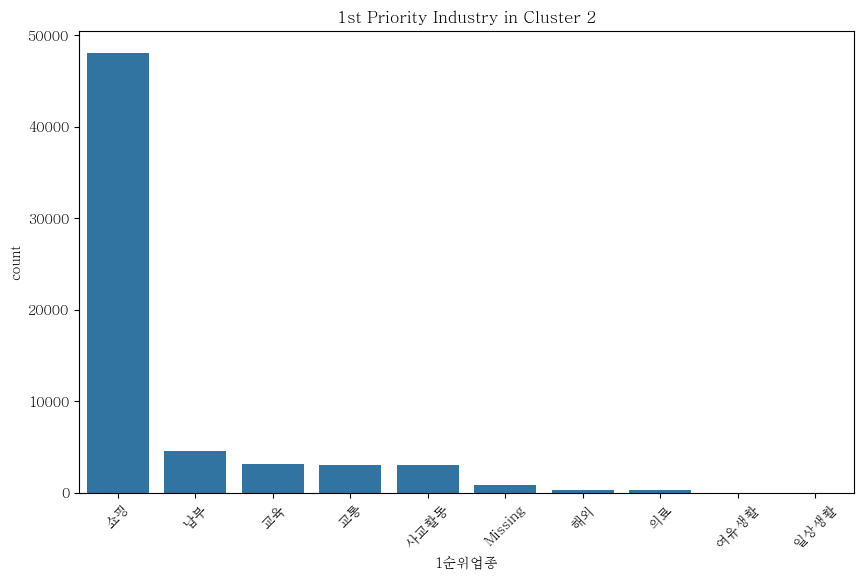

In [20]:
# 'Life_Stage' 변수의 분포 확인
plt.figure(figsize=(10, 6))
sns.countplot(x='Life_Stage', data=cluster_2_data, order=cluster_2_data['Life_Stage'].value_counts().index)
plt.title('Life Stage Distribution in Cluster 2')
plt.xticks(rotation=45)
plt.show()

# '연령' 변수의 분포 확인
plt.figure(figsize=(10, 6))
sns.countplot(x='연령', data=cluster_2_data, order=cluster_2_data['연령'].value_counts().index)
plt.title('age in Cluster 2')
plt.xticks(rotation=45)
plt.show()

# '1순위업종' 변수의 분포 확인
plt.figure(figsize=(10, 6))
sns.countplot(x='1순위업종', data=cluster_2_data, order=cluster_2_data['1순위업종'].value_counts().index)
plt.title('1st Priority Industry in Cluster 2')
plt.xticks(rotation=45)
plt.show()

In [21]:
# 클러스터 3 데이터 필터링
cluster_3_data = sampledata[sampledata['Cluster'] == 3]

In [22]:
# 클러스터 3의 데이터 통계 요약
print(cluster_3_data.describe())

# 클러스터 0의 범주형 변수에 대한 정보
print(cluster_3_data.describe(include='object'))

            정규화_부유도    Life_Stage      기준년월            연령  회원여부_이용가능  \
count  24233.000000  24233.000000   24233.0  24233.000000    24233.0   
mean       4.639566      3.727479  201812.0     36.910824        1.0   
std        0.677308      1.215855       0.0      9.486103        0.0   
min        3.741506      1.000000  201812.0     20.000000        1.0   
25%        4.109720      3.000000  201812.0     30.000000        1.0   
50%        4.482173      4.000000  201812.0     40.000000        1.0   
75%        5.013541      4.000000  201812.0     40.000000        1.0   
max        9.215974      7.000000  201812.0     60.000000        1.0   

       회원여부_이용가능_CA  회원여부_이용가능_카드론       소지여부_신용   소지카드수_유효_신용  소지카드수_이용가능_신용  \
count  24233.000000   24233.000000  24233.000000  24233.000000   24233.000000   
mean       0.957867       0.676309      0.999340      1.880370       1.786324   
std        0.200896       0.467893      0.025688      0.833294       0.805683   
min        0.000000       0

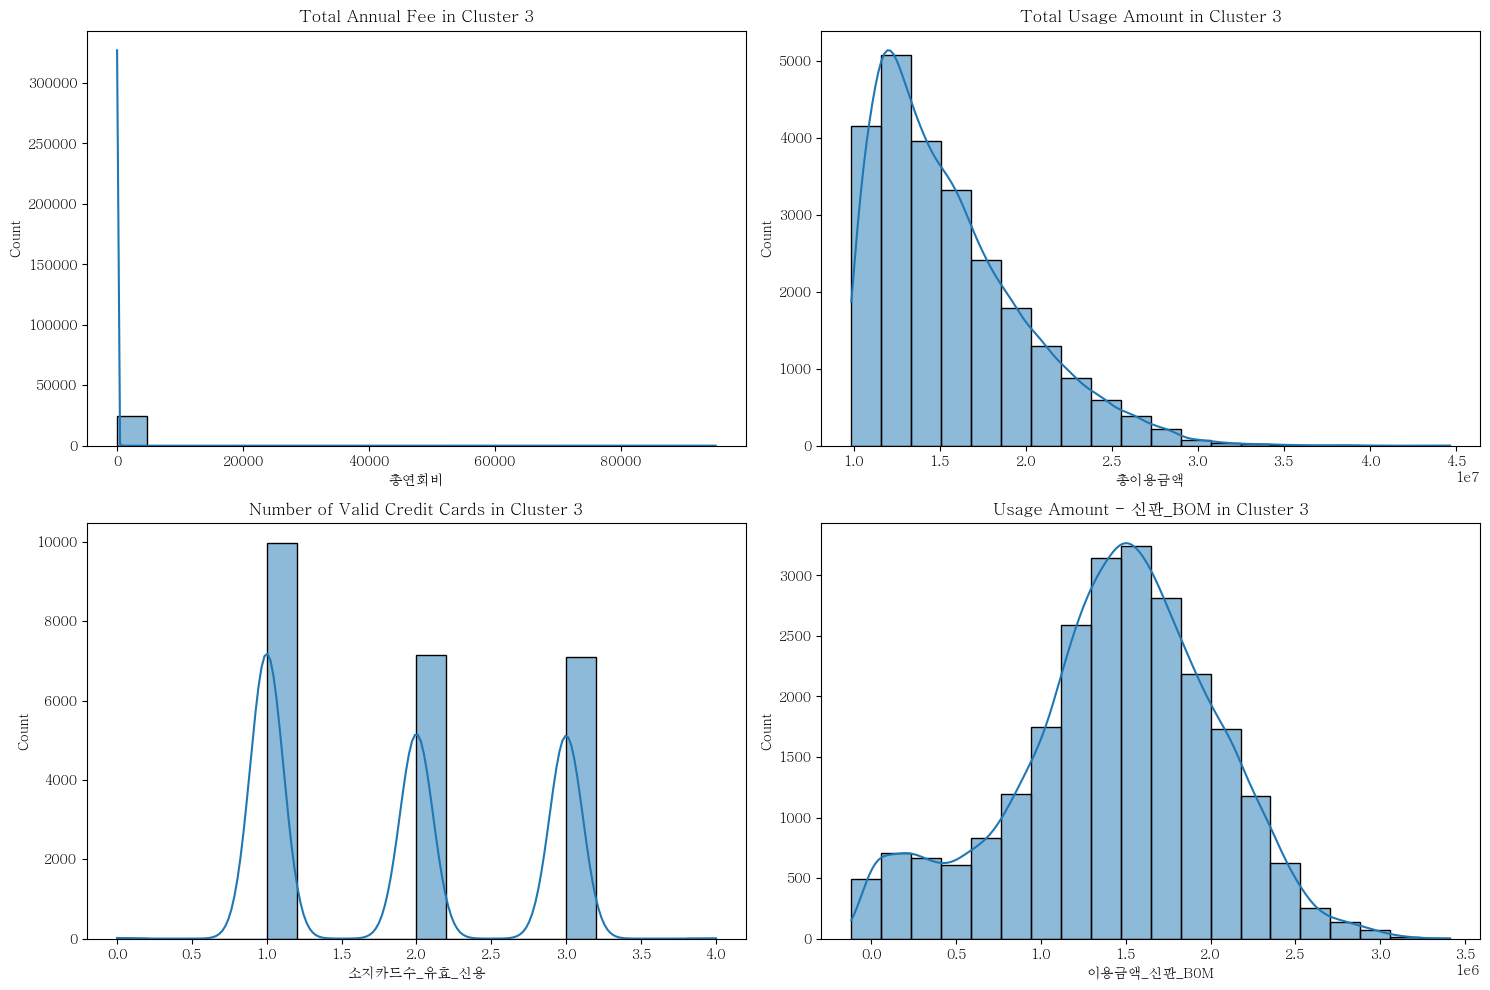

In [23]:
plt.figure(figsize=(15, 10))

# 총연회비 분포 확인
plt.subplot(2, 2, 1)
sns.histplot(cluster_3_data['총연회비'], bins=20, kde=True)
plt.title('Total Annual Fee in Cluster 3')

# 총이용금액 분포 확인
plt.subplot(2, 2, 2)
sns.histplot(cluster_3_data['총이용금액'], bins=20, kde=True)
plt.title('Total Usage Amount in Cluster 3')

# 소지카드수_유효_신용 분포 확인
plt.subplot(2, 2, 3)
sns.histplot(cluster_3_data['소지카드수_유효_신용'], bins=20, kde=True)
plt.title('Number of Valid Credit Cards in Cluster 3')

# 이용금액_신판_B0M 분포 확인
plt.subplot(2, 2, 4)
sns.histplot(cluster_3_data['이용금액_신판_B0M'], bins=20, kde=True)
plt.title('Usage Amount - 신판_BOM in Cluster 3')

plt.tight_layout()
plt.show()

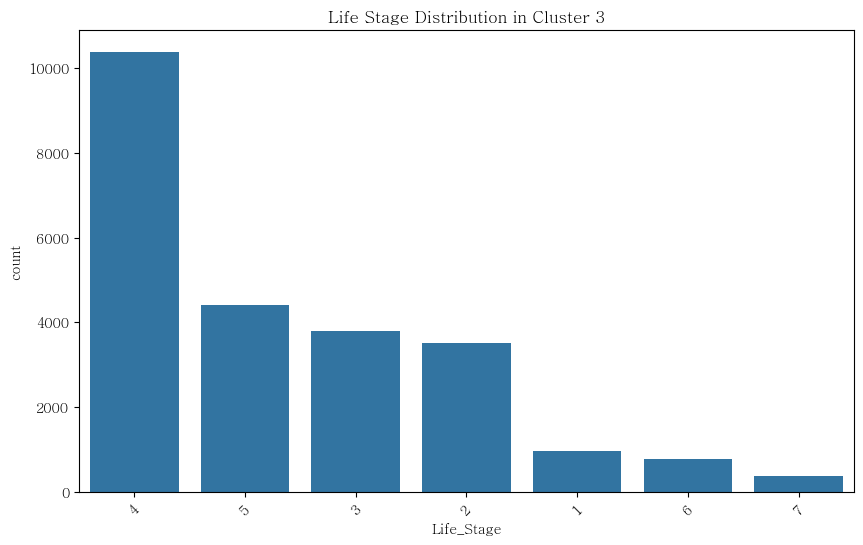

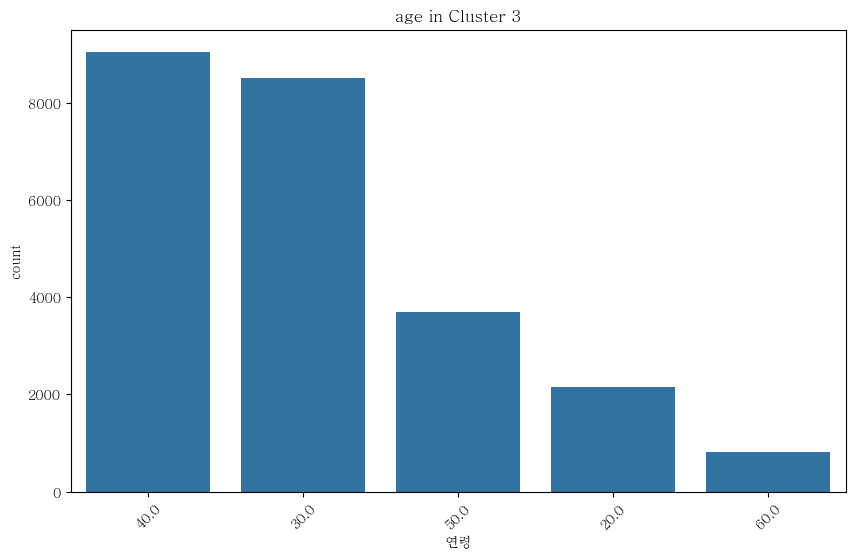

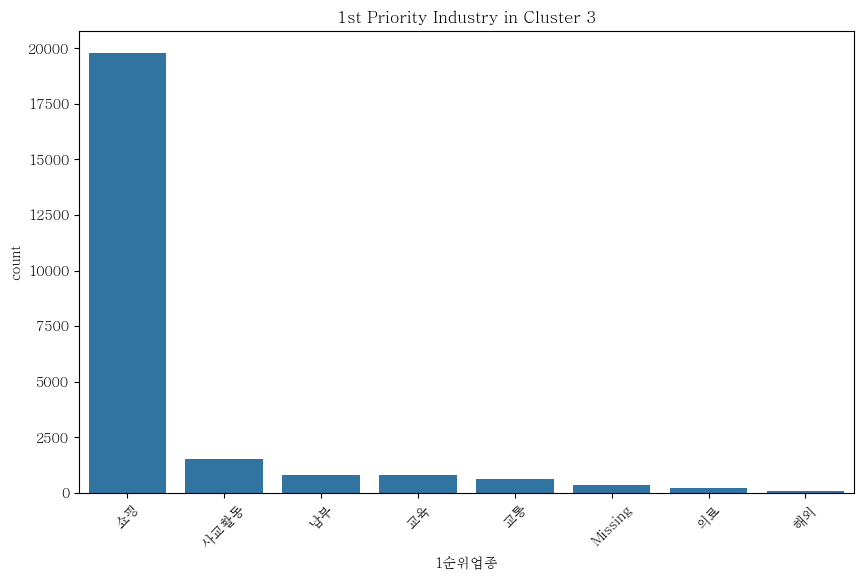

In [24]:
# 'Life_Stage' 변수의 분포 확인
plt.figure(figsize=(10, 6))
sns.countplot(x='Life_Stage', data=cluster_3_data, order=cluster_3_data['Life_Stage'].value_counts().index)
plt.title('Life Stage Distribution in Cluster 3')
plt.xticks(rotation=45)
plt.show()

# '연령' 변수의 분포 확인
plt.figure(figsize=(10, 6))
sns.countplot(x='연령', data=cluster_3_data, order=cluster_3_data['연령'].value_counts().index)
plt.title('age in Cluster 3')
plt.xticks(rotation=45)
plt.show()

# '1순위업종' 변수의 분포 확인
plt.figure(figsize=(10, 6))
sns.countplot(x='1순위업종', data=cluster_3_data, order=cluster_3_data['1순위업종'].value_counts().index)
plt.title('1st Priority Industry in Cluster 3')
plt.xticks(rotation=45)
plt.show()